In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [5]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [6]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [7]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from linear_regression_gd import LinearRegressorGD

In [11]:
reg = LinearRegressorGD()

In [12]:
reg.fit(X_train, y_train)

In [13]:
reg.get_params()

{'intercept': np.float64(164.12012589334785),
 'coef': array([5634.41165174, -417.86915201, 1138.20770305, -966.84818296,
          17.61141576,  337.18672939, 5730.38413795, 1042.67692786,
        1183.68438802])}

In [14]:
y_pred = reg.predict(X_test)

In [15]:
score = r2_score(y_pred, y_test)

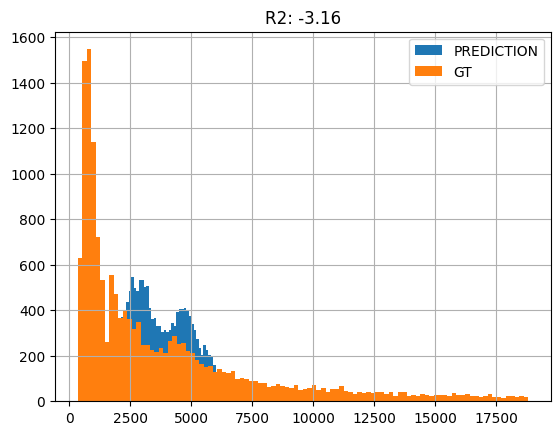

In [16]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
print(linreg.coef_, linreg.intercept_)

[[51148.25187875   472.47472887 -1974.69216261  3530.7720608
  -2905.6766965  -1449.95988869 -8721.95669848  1098.0443115
   -324.00144698]] [2986.54927596]


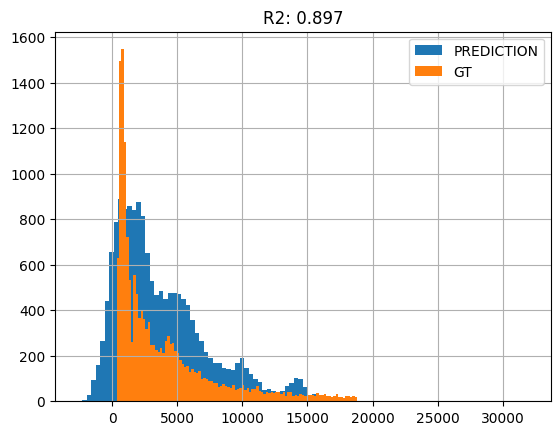

In [18]:
y_pred2 = linreg.predict(X_test)
score2 = r2_score(y_pred2, y_test)
plt.title(f'R2: {str(score2)[:5]}')
plt.hist(y_pred2.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
reg3 = LinearRegressorGD()
reg3.fit(X_train_scaled, y_train)

In [21]:
reg3.get_params()

{'intercept': np.float64(3950.20469169367),
 'coef': array([3242.11068032,  137.82982319, -518.37186866,  864.24910004,
         -26.99529342,  -43.96119588,  675.70301062,  106.61317809,
          97.76906153])}

In [22]:
y_pred3 = reg.predict(X_test_scaled)

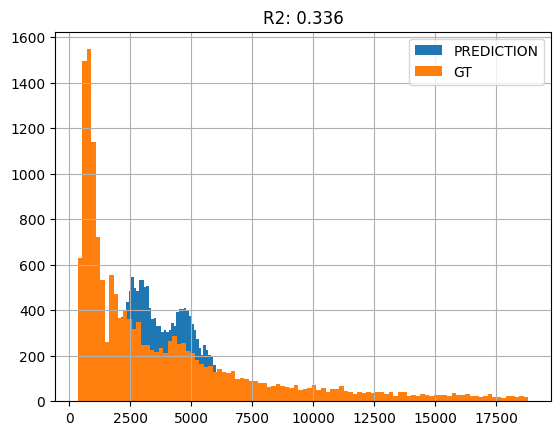

In [23]:
score3 = r2_score(y_pred3, y_test)
plt.title(f'R2: {str(score3)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

{'intercept': np.float64(3950.204698341717), 'coef': array([ 4.98093841e+03,  1.31948119e+02, -5.59434760e+02,  8.33542823e+02,
       -1.11885526e+02, -6.39785578e+01, -7.95525583e+02, -1.16112214e+00,
       -4.23070709e+01])}


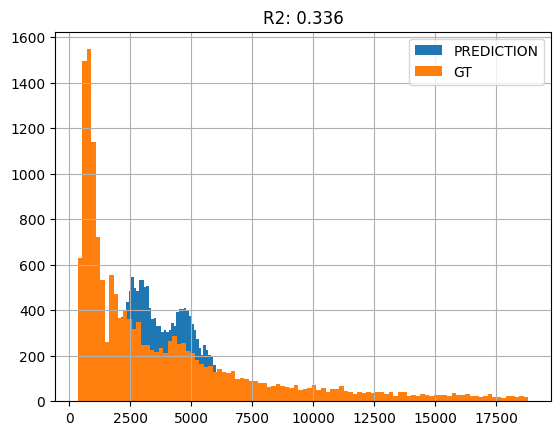

In [29]:
reg4 = LinearRegressorGD(learning_rate = 0.01, n_iter = 10000)
reg4.fit(X_train_scaled, y_train)
print(reg4.get_params())
y_pred4 = reg.predict(X_test_scaled)
score4 = r2_score(y_pred4, y_test)
plt.title(f'R2: {str(score4)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

In [25]:
from mlp_regressor import MLPRegressor

In [30]:
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)

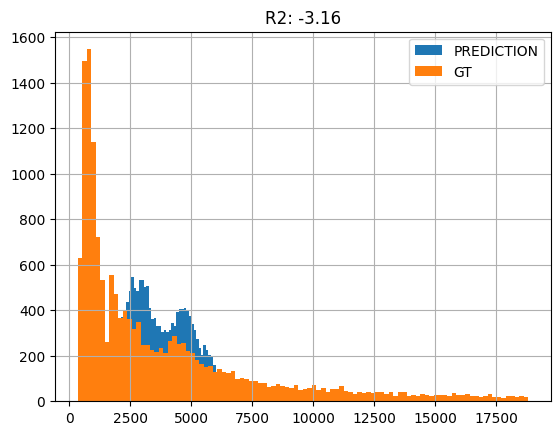

In [31]:
mlp_y_pred = reg.predict(X_test)
mlp_score = r2_score(mlp_y_pred, y_test)
plt.title(f'R2: {str(mlp_score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();